# TAREA ACADÉMICA: REDUCCIÓN DIMENSIONAL


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
#Cargamos el Dataset Correspondiente
filename = 'data.csv'
dataset = pd.read_csv(filename)

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Observamos que se agrega una columna con valores nulos (probablemente por un problema de formato en el CSV). Por tanto, tenemos
que eliminarla directamente del Dataset.

In [ ]:
#Eliminamos columna nula

dataset = dataset.drop(columns=['Unnamed: 32'])

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Comenzaremos con la limpieza de valores nulos, en caso existan:

In [ ]:
#Verificamos la existencia de valores nulos por columna

dataset.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Observamos que, para el presente conjunto de datos, no existen valores nulos en ninguna de las columnas. Por tanto, podemos proseguir con el experimento.

OBservación: Asimismo, es bastante claro que el 'id' de una respectiva instancia es poco relevante y podría impedir una selección de atributos óptima. Sin embargo, este no será eliminado para probar la capacidad de los distintos métodos de selección de atributos.

# **1. Selección de Atributos**
Un modelo de Inteligencia Artificial es capaz de realizar predicciones en base a los diferentes datos que se obtengan de una fuente de información. Sin embargo, una gran cantidad de atributos puede ser contraproducente para el modelo. Es por ello que realizaremos una técnica de selección de atributos; para cada una de las técnicas aplicadas y los atributos obtenidos realizaremos un modelo diferente.

In [ ]:
#Cargamos las respectivas bibliotecas
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
np.set_printoptions(precision=2)   # setea para que solo se impriman 2 decimales

array = dataset.values;

# Separamos atributos y el target
X = np.delete(array, 1, axis=1)  # Eliminamos la segunda columna (índice 1) de los atributos, ya que es el target como tal
y = array[:, 1]  #Incluímos la segunda columna (el target)

##Selección de atributos con Filtros

La selección de atributos con filtro tiene como objetivo evaluar la relevancia de los atributos en función del target, apoyándose de pruebas estadísticas. Para el presente experimento, nos apoyaremos de la prueba Chi-Cuadrado, la cual es bastante popular y efectiva para medir la independencia entre variables.

Consideramos un k = 12, poco menos de la mitad de atributos totales (32)

In [ ]:
fit_selector = SelectKBest(score_func=chi2, k=12).fit(X, y)

# muestra resultados de seleccion
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Scores de Atributos: {}".format(fit_selector.scores_))

Atributos Seleccionados: [ 0  1  2  3  4 13 14 21 22 23 24 27]
Scores de Atributos: [4.62e+08 2.66e+02 9.39e+01 2.01e+03 5.40e+04 1.50e-01 5.40e+00 1.97e+01
 1.05e+01 2.57e-01 7.43e-05 3.47e+01 9.79e-03 2.51e+02 8.76e+03 3.27e-03
 6.14e-01 1.04e+00 3.05e-01 8.04e-05 6.37e-03 4.92e+02 1.74e+02 3.67e+03
 1.13e+05 3.97e-01 1.93e+01 3.95e+01 1.35e+01 1.30e+00 2.32e-01]


Ahora, obtendremos el dataset reducido, para utilizarlo más adelante en el entrenamiento del ML

In [ ]:
X_filtered_chi2 = fit_selector.transform(X)
print(X_filtered_chi2)

[[842302 17.99 10.38 ... 184.6 2019.0 0.7119]
 [842517 20.57 17.77 ... 158.8 1956.0 0.2416]
 [84300903 19.69 21.25 ... 152.5 1709.0 0.4504]
 ...
 [926954 16.6 28.08 ... 126.7 1124.0 0.3403]
 [927241 20.6 29.33 ... 184.6 1821.0 0.9387]
 [92751 7.76 24.54 ... 59.16 268.6 0.0]]


##Selección de atributos con Wrappers



A diferencia de los Filtros, la selección de atributos por Wrappers no se apoyan directamente de inferencias estadísticas, ya que hacen uso de un modelo de ML para la selección de atributos, lo cual implica que esta metodología tiene que realizar un proceso iterativo.

La cantidad de atributos a seleccionar será la misma que en el método anterior (12), por lo que seleccionaremos un número alto de iteraciones (15000) para asegurar la convergencia del modelo logístico

In [ ]:
# aplica RFE con algoritmo Logistic Regression como evaluador de atributos. Se le pide los mejores 4 atributos
predictor = LogisticRegression(max_iter=15000)  # define modelo predictor (regresor logistico)
rfe = RFE(predictor, n_features_to_select=12)    # instancia objeto RFE
fit_selector = rfe.fit(X, y)    # ejecuta el algoritmo RFE con la data pasada

print("Numero de Atributos: {}".format(fit_selector.n_features_))
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Ranking de Atributos: {}".format(fit_selector.ranking_))

Numero de Atributos: 12
Atributos Seleccionados: [ 1  6  7  8 12 13 21 25 26 27 28 29]
Ranking de Atributos: [20  1  5 11 18  4  1  1  1  2 14 10  1  1  7 16  9 15 13 12 17  1  3  6
 19  1  1  1  1  1  8]


In [ ]:
X_filtered_RFE = fit_selector.transform(X)
print(X_filtered_RFE)

[[17.99 0.2776 0.3001 ... 0.7119 0.2654 0.4601]
 [20.57 0.07864 0.0869 ... 0.2416 0.186 0.275]
 [19.69 0.1599 0.1974 ... 0.4504 0.243 0.3613]
 ...
 [16.6 0.1023 0.09251 ... 0.3403 0.1418 0.2218]
 [20.6 0.277 0.3514 ... 0.9387 0.265 0.4087]
 [7.76 0.04362 0.0 ... 0.0 0.0 0.2871]]


# **2. Transformación de Atributos**

Por otro lado, tal y como se mencionó previamente, es necesario que el modelo no tenga una cantidad de atributos demasiado grande ya que puede influir negativamente en su desempeño. Bajo dicha idea, otra de las técnicas de reducción dimensional es la popular transformación de atributos que, como su nombre bien indica, antes de buscar descartar directamente atributos, lo que busca es la transformación de estos, principalmente buscando la reducción de su dimensionalidad sin perder la información de los datos.

Para el presente experimento, buscaremos que la proyección también nos devuelva un dataset igual a 12.

##Análisis de Componentes Principales (PCA)

Probablemente el análisis más importante para la transformación de atributos, el Ánalisis de Componentes Principales (PCA por sus siglas) busca transformar un conjunto de atributos originales en nuevo conjunto de variables, los cuales pasan a llamarse 'componentes principales'. Dichos componentes en realidad son combinaciones lineales de los atributos originales, los cuales han de contener la mayor varianza de los datos.

Primero, hemos de aplicar un componente de estandarización

In [ ]:
#Importamos las respectivas librerias para realizar aplicar PCA y estandarización
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Utilizaremos StandardScaler para estandarizar todas las columnas de los atributos originales
standardizer = StandardScaler()
standardizedX = standardizer.fit_transform(X)

Posteriormente, aplicamos PCA y obtenemos los componentes principales

In [ ]:
# aplica transformacion PCA
pca = PCA(n_components=12)
fit_pca = pca.fit(standardizedX)
X_transformed_pca = fit_pca.transform(standardizedX)

# muestra resultados de transformacion PCA
print("Ratio de varianza explicada: {}".format(fit_pca.explained_variance_ratio_))

Ratio de varianza explicada: [0.43 0.18 0.09 0.06 0.05 0.04 0.03 0.02 0.01 0.01 0.01 0.01]


In [ ]:
X_transformed_pca

array([[ 9.18,  1.97, -1.17, ..., -0.09, -0.88,  0.26],
       [ 2.38, -3.75, -0.58, ..., -0.66,  1.09,  0.81],
       [ 5.74, -1.08, -0.53, ..., -0.08,  0.43, -0.6 ],
       ...,
       [ 1.25, -1.89,  0.53, ...,  0.48,  0.58, -0.85],
       [10.37,  1.7 , -1.91, ..., -0.52, -0.12, -0.18],
       [-5.48, -0.67,  1.48, ...,  0.68,  0.05, -0.15]])

In [ ]:
print("Componentes principales:")
print(fit_pca.components_)

Componentes principales:
[[ 2.29e-02  2.19e-01  1.04e-01  2.28e-01  2.21e-01  1.42e-01  2.39e-01
   2.58e-01  2.61e-01  1.38e-01  6.41e-02  2.06e-01  1.74e-02  2.11e-01
   2.03e-01  1.47e-02  1.70e-01  1.54e-01  1.83e-01  4.24e-02  1.02e-01
   2.28e-01  1.05e-01  2.37e-01  2.25e-01  1.28e-01  2.10e-01  2.29e-01
   2.51e-01  1.23e-01  1.32e-01]
 [-3.41e-02 -2.33e-01 -6.00e-02 -2.15e-01 -2.31e-01  1.86e-01  1.52e-01
   6.05e-02 -3.42e-02  1.91e-01  3.67e-01 -1.06e-01  8.95e-02 -8.98e-02
  -1.53e-01  2.03e-01  2.33e-01  1.97e-01  1.30e-01  1.84e-01  2.80e-01
  -2.19e-01 -4.55e-02 -1.99e-01 -2.19e-01  1.73e-01  1.44e-01  9.85e-02
  -7.53e-03  1.43e-01  2.76e-01]
 [ 9.69e-02 -1.14e-02  6.69e-02 -1.21e-02  2.63e-02 -1.03e-01 -7.48e-02
   1.76e-03 -2.76e-02 -4.10e-02 -2.08e-02  2.67e-01  3.71e-01  2.65e-01
   2.16e-01  3.12e-01  1.55e-01  1.77e-01  2.24e-01  2.85e-01  2.12e-01
  -4.94e-02 -3.98e-02 -5.04e-02 -1.32e-02 -2.55e-01 -2.35e-01 -1.72e-01
  -1.70e-01 -2.71e-01 -2.29e-01]
 [ 2.66e-02 

# **3. Entrenando Modelo de Clasificación**




Finalmente, luego de aplicar 3 técnicas de reducción dimensional (2 de selección de atributos y 1 de transformación de atributos), podemos entrenar un modelo de clasificación y observar qué conjunto de datos brindó el mejor desempeño.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest   # para seleccionar atributos de forma univariada (filtros)
from sklearn.feature_selection import chi2   # estadististica para evaluar la importancia de atributos en relacion al target
from sklearn.feature_selection import RFE    # metodo recursive featute elimination
from sklearn.decomposition import PCA        # para transformacion PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # para modelos discriminantes lineales
from sklearn.naive_bayes import GaussianNB   # para modelos Naive Bayes
from sklearn.linear_model import LogisticRegression # para usar modelos de regresion logistica
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn
from sklearn.svm import SVC   # para modelos SVM

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion

from sklearn.metrics import accuracy_score, balanced_accuracy_score   # para manejar metricas de desempeño
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion
from sklearn.metrics import jaccard_score  # indice jacard

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score


In [ ]:
X1 = X_filtered_chi2
X2 = X_filtered_RFE
X3 = X_transformed_pca

In [ ]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)  # Estrategia de 10-fold CV
model = RandomForestClassifier(random_state=seed)  # Modelo a evaluar

In [ ]:
def evaluate_model(X, y, model, kfold):
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='balanced_accuracy')
    print(f"Balanced Accuracy: {cv_results.mean():.4f} ± {cv_results.std():.4f}")
    return cv_results

Como etapa inicial empezamos evaluando inicialmente con el algoritmo Random Forest para tener una noción previa. Sin embargo, continuamos con experimentos a continuación.

In [ ]:
# Evaluación con cada dataset
print("Evaluando con Chi2...")
results_chi2 = evaluate_model(X1, y, model, kfold)

print("\nEvaluando con RFE...")
results_RFE = evaluate_model(X2, y, model, kfold)

print("\nEvaluando con PCA...")
results_PCA = evaluate_model(X3, y, model, kfold)

Evaluando con Chi2...
Balanced Accuracy: 0.9472 ± 0.0242

Evaluando con RFE...
Balanced Accuracy: 0.9343 ± 0.0230

Evaluando con PCA...
Balanced Accuracy: 0.9453 ± 0.0195


In [ ]:
# realiza el train-test split
vadid_fraction = 0.20    # proporcion de muestras para validacion
seed = 7   # semilla para el generador aleatorio (para reproductibilidad)

#Data de train y test sin ningún modelo:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=vadid_fraction, random_state=seed)

#Data de train y test para el primer modelo:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y, test_size=vadid_fraction, random_state=seed)

#Data de train y test para el segundo modelo:
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y, test_size=vadid_fraction, random_state=seed)

#Data de train y test para el tercder modelo:
X3_train, X3_valid, y3_train, y3_valid = train_test_split(X3, y, test_size=vadid_fraction, random_state=seed)

In [ ]:
# Definimos el pool de algoritmos de ML a evaluar
algos = []
algos.append(('LogReg', LogisticRegression( solver='liblinear')))  #genera logistic regresors con solver liblinear
algos.append(('5NN', KNeighborsClassifier( n_neighbors=5))) #genera knn con 5 vecinos
algos.append(('10NN', KNeighborsClassifier( n_neighbors=10))) #genera knn con 5 vecinos
algos.append(('CART', DecisionTreeClassifier(max_depth=None ))) # genera DT sin restriccion de profundidad


In [ ]:
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results_NoRed = []
names_NoRed = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada algoritmo de ML
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='balanced_accuracy')
    results_NoRed.append(cv_results)
    names_NoRed.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LogReg: 0.6273117611799479 (0.18510749076371835)
5NN: 0.7207241731973115 (0.052154753857374565)
10NN: 0.6263826780343223 (0.041726919293768115)
CART: 0.9351822335229674 (0.0367925343425853)


In [ ]:
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results_filter = []
names_filter = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada algoritmo de ML
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X1_train, y1_train, cv=kfold, scoring='balanced_accuracy')
    results_filter.append(cv_results)
    names_filter.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LogReg: 0.5905606091062152 (0.15877282153604116)
5NN: 0.7207241731973115 (0.052154753857374565)
10NN: 0.6263826780343223 (0.041726919293768115)
CART: 0.9385825788048718 (0.03515710697402684)


In [ ]:
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results_RFE = []
names_RFE = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada algoritmo de ML
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X3_train, y3_train, cv=kfold, scoring='balanced_accuracy')
    results_RFE.append(cv_results)
    names_RFE.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LogReg: 0.9657769730755114 (0.028551296656286272)
5NN: 0.9601935518670901 (0.03228428394503716)
10NN: 0.9526366477725174 (0.029782268193655866)
CART: 0.9086157472750536 (0.04944422749752703)


In [ ]:
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results_PCA = []
names_PCA = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada algoritmo de ML
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X3_train, y3_train, cv=kfold, scoring='balanced_accuracy')
    results_PCA.append(cv_results)
    names_PCA.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LogReg: 0.9657769730755114 (0.028551296656286272)
5NN: 0.9601935518670901 (0.03228428394503716)
10NN: 0.9526366477725174 (0.029782268193655866)
CART: 0.916419613649947 (0.03824849633233288)


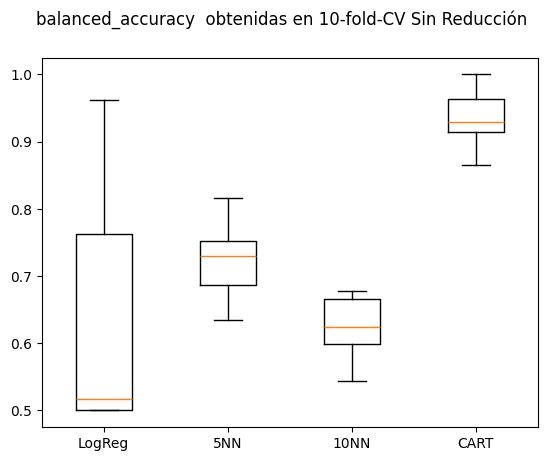

In [ ]:
fig = plt.figure()
fig.suptitle('balanced_accuracy  obtenidas en 10-fold-CV Sin Reducción')
ax = fig.add_subplot(111)
plt.boxplot(results_NoRed)
ax.set_xticklabels(names_NoRed)
plt.show()

In [ ]:
# Reentrena modelo LR con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model_NoRed =  DecisionTreeClassifier(max_depth=None , class_weight = 'balanced') #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model_NoRed.fit(X_train, y_train)

# predice la c lase del conjunto de validacion
y_predicted = model_NoRed.predict(X_valid)
print("Balanced Accuracy score:", balanced_accuracy_score(y_valid, y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("\nMatriz de Confusión:")
print(confusion_matrix(y_valid, y_predicted))

# muestra un reporte de la clasificacion en validacion
print("\nReporte de clasificacion en conjunto de validacion: \n")
print(classification_report(y_valid, y_predicted))

Balanced Accuracy score: 0.9182432432432432

Matriz de Confusión:
[[73  1]
 [ 6 34]]

Reporte de clasificacion en conjunto de validacion: 

              precision    recall  f1-score   support

           B       0.92      0.99      0.95        74
           M       0.97      0.85      0.91        40

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



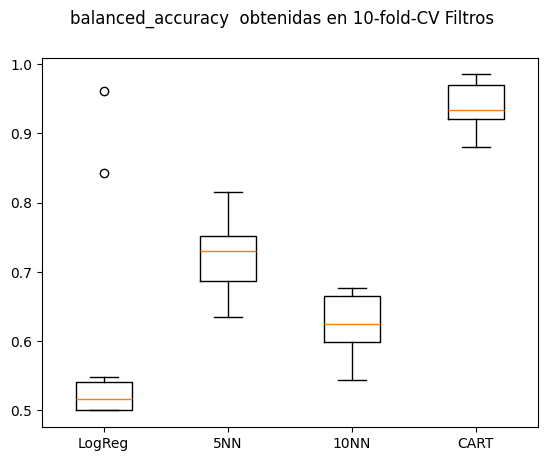

In [ ]:
fig = plt.figure()
fig.suptitle('balanced_accuracy  obtenidas en 10-fold-CV Filtros')
ax = fig.add_subplot(111)
plt.boxplot(results_filter)
ax.set_xticklabels(names_filter)
plt.show()

In [ ]:
# Reentrena modelo LR con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model_filter =  DecisionTreeClassifier(max_depth=None , class_weight = 'balanced') #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model_filter.fit(X1_train, y1_train)

# predice la c lase del conjunto de validacion
y1_predicted = model_filter.predict(X1_valid)
print("Balanced Accuracy score:", balanced_accuracy_score(y1_valid, y1_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("\nMatriz de Confusión:")
print(confusion_matrix(y1_valid, y1_predicted))

# muestra un reporte de la clasificacion en validacion
print("\nReporte de clasificacion en conjunto de validacion: \n")
print(classification_report(y1_valid, y1_predicted))

Balanced Accuracy score: 0.8797297297297297

Matriz de Confusión:
[[71  3]
 [ 8 32]]

Reporte de clasificacion en conjunto de validacion: 

              precision    recall  f1-score   support

           B       0.90      0.96      0.93        74
           M       0.91      0.80      0.85        40

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114



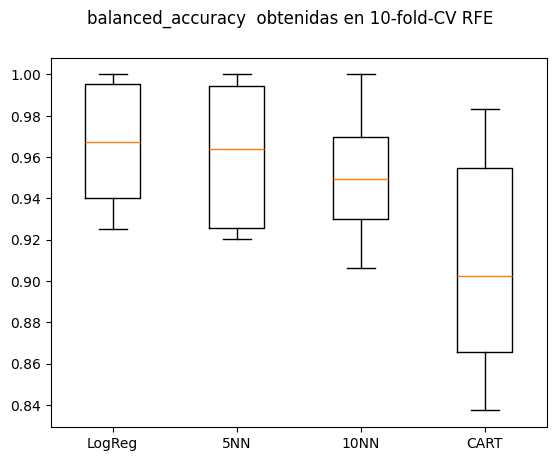

In [ ]:
fig = plt.figure()
fig.suptitle('balanced_accuracy  obtenidas en 10-fold-CV RFE')
ax = fig.add_subplot(111)
plt.boxplot(results_RFE)
ax.set_xticklabels(names_RFE)
plt.show()

In [ ]:
# Reentrena modelo LR con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model_RFE = LogisticRegression(solver='liblinear', class_weight = 'balanced') #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model_RFE.fit(X2_train, y2_train)

# predice la c lase del conjunto de validacion
y2_predicted = model_RFE.predict(X2_valid)
print("Balanced Accuracy score:", balanced_accuracy_score(y2_valid, y2_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("\nMatriz de Confusión:")
print(confusion_matrix(y2_valid, y2_predicted))

# muestra un reporte de la clasificacion en validacion
print("\nReporte de clasificacion en conjunto de validacion: \n")
print(classification_report(y2_valid, y2_predicted))

Balanced Accuracy score: 0.8922297297297297

Matriz de Confusión:
[[71  3]
 [ 7 33]]

Reporte de clasificacion en conjunto de validacion: 

              precision    recall  f1-score   support

           B       0.91      0.96      0.93        74
           M       0.92      0.82      0.87        40

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



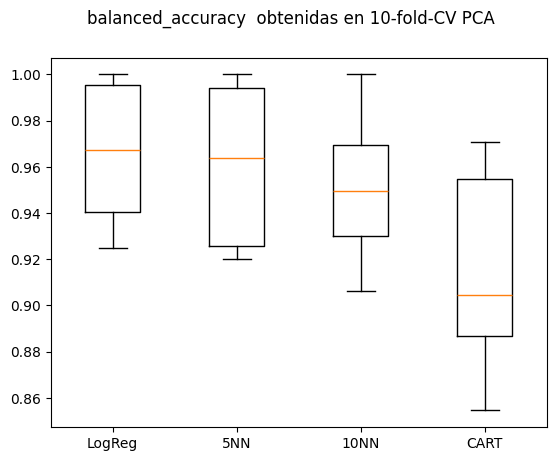

In [ ]:
fig = plt.figure()
fig.suptitle('balanced_accuracy  obtenidas en 10-fold-CV PCA')
ax = fig.add_subplot(111)
plt.boxplot(results_PCA)
ax.set_xticklabels(names_PCA)
plt.show()

In [ ]:
# Reentrena modelo LR con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model_PCA = LogisticRegression(solver='liblinear', class_weight = 'balanced') #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model_PCA.fit(X3_train, y3_train)

# predice la c lase del conjunto de validacion
y3_predicted = model_PCA.predict(X3_valid)
print("Balanced Accuracy score:", balanced_accuracy_score(y3_valid, y3_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("\nMatriz de Confusión:")
print(confusion_matrix(y3_valid, y3_predicted))

# muestra un reporte de la clasificacion en validacion
print("\nReporte de clasificacion en conjunto de validacion: \n")
print(classification_report(y3_valid, y3_predicted))

Balanced Accuracy score: 0.9875

Matriz de Confusión:
[[74  0]
 [ 1 39]]

Reporte de clasificacion en conjunto de validacion: 

              precision    recall  f1-score   support

           B       0.99      1.00      0.99        74
           M       1.00      0.97      0.99        40

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

